## **Aprendizaje supervisado**. *Calculando el precio de un vehículo con validación cruzada*

In [ ]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

*   Se cargan los datos del archivo CSV a un **dataframe**. Un dataframe es una estructura de datos con filas y columnas

In [ ]:
dataFrame1=pd.read_csv('car prices dataset.csv')
dataFrame1

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti 800 AC,2007,70000,0,0,0,1,6000
1,Maruti Wagon R LXI Minor,2007,50000,0,0,0,1,13500
2,Hyundai Verna 1.6 SX,2012,100000,1,0,0,1,60000
3,Datsun RediGO T Option,2017,46000,0,0,0,1,25000
4,Honda Amaze VX i-DTEC,2014,141000,1,0,0,2,45000
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (1),2014,80000,1,0,0,2,40999
4336,Hyundai i20 Magna 1.4 CRDi,2014,80000,1,0,0,2,40999
4337,Maruti 800 AC BSIII,2009,83000,0,0,0,2,11000
4338,Hyundai Creta 1.6 CRDi SX Option,2016,90000,1,0,0,1,86500


In [ ]:
dataFrame1.describe()

,year,km_driven,fuel,seller_type,transmission,owner,selling_price
count,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,2013.090783,66215.777419,0.531336,0.276037,0.103226,1.454839,50412.695853
std,4.215344,46644.102194,0.549621,0.496892,0.304289,0.707212,57854.880395
min,1992.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2000.000000
25%,2011.000000,35000.000000,0.000000,0.000000,0.000000,1.000000,20874.750000
50%,2014.000000,60000.000000,1.000000,0.000000,0.000000,1.000000,35000.000000
75%,2016.000000,90000.000000,1.000000,1.000000,0.000000,2.000000,60000.000000
max,2020.000000,806599.000000,4.000000,2.000000,1.000000,4.000000,890000.000000


*   Se usa *info()* para conocer las columnas del dataframe, la cantidad de datos nulos, el tipo de datos de cada columna, y la cantidad de filas

In [ ]:
dataFrame1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   int64 
 4   seller_type    4340 non-null   int64 
 5   transmission   4340 non-null   int64 
 6   owner          4340 non-null   int64 
 7   selling_price  4340 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 271.4+ KB


*   Se seleccionan las **variables independientes**

In [ ]:
X = dataFrame1[["year", "km_driven", "fuel", "transmission", "owner"]]
X

,year,km_driven,fuel,transmission,owner
0,2007,70000,0,0,1
1,2007,50000,0,0,1
2,2012,100000,1,0,1
3,2017,46000,0,0,1
4,2014,141000,1,0,2
...,...,...,...,...,...
4335,2014,80000,1,0,2
4336,2014,80000,1,0,2
4337,2009,83000,0,0,2
4338,2016,90000,1,0,1


*   Se selecciona la **variable dependiente**

In [ ]:
Y = dataFrame1[["selling_price"]]
Y

,selling_price
0,6000
1,13500
2,60000
3,25000
4,45000
...,...
4335,40999
4336,40999
4337,11000
4338,86500


*   Se separa el conjunto de datos en **80% para el entrenamiento** y **20% para pruebas**. La separación se hace indicando el dataframe que tiene las variables independientes (X) y el dataframe con la variable dependiente (Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

*   Se entrena un modelo de regresión

In [ ]:
modelo1 = LinearRegression()
modelo1.fit(X_train,Y_train)

LinearRegression()

*   Una vez entrenado el modelo, se usa para hacer las predicciones sobre el conjunto de prueba. Al modelo solo se le pasan los valores de X, es decir, los variables independiente en el conjunto de prueba

In [ ]:
predicciones = modelo1.predict(X_test)
predicciones

array([[ 1.39809721e+05],
       [-1.95487296e+01],
       [ 3.75177272e+04],
       [ 4.35036949e+04],
       [ 5.07896792e+04],
       [ 4.26971999e+04],
       [ 4.77552464e+04],
       [ 1.42410021e+05],
       [ 7.92398565e+04],
       [ 6.36656664e+04],
       [ 4.86253223e+04],
       [ 5.28625188e+04],
       [ 5.39848390e+04],
       [ 6.50764119e+03],
       [ 5.25026221e+04],
       [ 1.58541754e+05],
       [ 1.39011887e+05],
       [ 2.40714423e+04],
       [ 6.12844403e+04],
       [ 2.47900043e+04],
       [-1.48864844e+04],
       [ 1.82623768e+04],
       [ 1.00804683e+04],
       [ 5.25026221e+04],
       [-4.01053823e+03],
       [ 6.12844403e+04],
       [ 4.38781865e+04],
       [-6.50241131e+03],
       [ 3.65922022e+04],
       [ 3.89673812e+03],
       [ 1.42724951e+05],
       [ 6.07692939e+04],
       [ 5.17152978e+04],
       [ 6.32421367e+04],
       [ 1.59814228e+05],
       [ 2.91700531e+04],
       [ 6.00866837e+04],
       [ 1.13446885e+05],
       [ 5.3

*   Se calculan las medidas de error para conocer si el modelo logra predecir los valores de las vehículos en el conjunto de prueba

In [ ]:
MAE = metrics.mean_absolute_error(Y_test, predicciones)
RMSE=np.sqrt(mean_squared_error(Y_test, predicciones))
coeficiente= r2_score(Y_test, predicciones)
MAPE=mean_absolute_percentage_error(Y_test, predicciones)

print("MAE = ",MAE)
print("RMSE = ",RMSE)
print("Coeficiente de determinación = ",coeficiente)
print("MAPE (Mean absolute percentage error) = ",MAPE)

MAE =  23883.202241754305
RMSE =  44603.46799950041
Coeficiente de determinación =  0.4383595874697205
MAPE (Mean absolute percentage error) =  0.6865281380534184


# **Validación cruzada.** La validación cruzada es una técnica que permite evaluar modelos de machine learning usando diferentes subconjuntos de los datos para entrenar para luego evaluarlos con el subconjunto complementario.

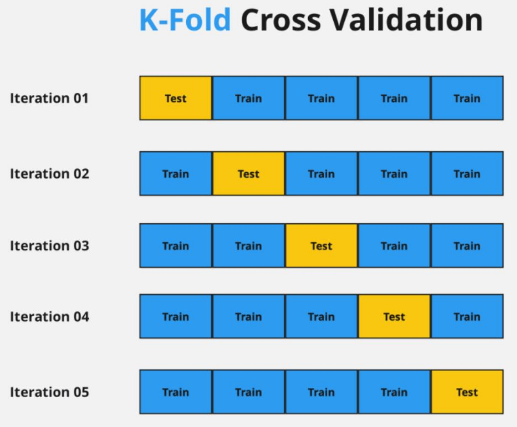



# Validación cruzada con k=5



In [ ]:
from sklearn.model_selection import cross_val_score

modelo2=LinearRegression()
validacion2=cross_val_score(modelo2, X, Y, cv=5, scoring="neg_mean_absolute_error")
print(validacion2)

[-24408.59822334 -24308.64613588 -23444.77273939 -22096.2207402
 -22972.78749143]





*   Se puede obtener el promedio y la desviación


In [ ]:
print("El modelo 2 tiene un MAE promedio de %f con una desviación estándar de %f" % (validacion2.mean(), validacion2.std()))

El modelo 2 tiene un MAE promedio de -23446.205066 con una desviación estándar de 862.158816




# Validación cruzada con k=10



In [ ]:
from sklearn.model_selection import cross_val_score
modelo3=LinearRegression()
validacion3=cross_val_score(modelo3, X, Y, cv=10, scoring="neg_mean_absolute_error")
print(validacion3)

[-21533.38305338 -27455.75646602 -28080.99638787 -20820.33566708
 -21221.99599317 -25723.61268867 -21731.55500125 -21883.5541165
 -25249.60038186 -20462.39327606]


In [ ]:
print("El modelo 3 tiene un MAE promedio de %f con una desviación estándar de %f" % (validacion3.mean(), validacion3.std()))

El modelo 3 tiene un MAE promedio de -23416.318303 con una desviación estándar de 2752.705955
